In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from adjustText import adjust_text
import numpy as np

import nfl_data_py as nfl

In [2]:
receivers = pd.read_csv('../data/espn_receiver_stats.csv')

In [3]:
receivers = receivers[receivers['Year'] == 2022].reset_index(drop=True)

In [4]:
receivers

,Player,Team,Pos.,yds,routes,tgts,Yds/Rt,Open,Catch,YAC,OverallOVR,Year
0,A.J. Brown,Eagles,WR,"1,642",592,161,2.8,92,61,62,88,2022
1,Justin Jefferson,Vikings,WR,"1,856",667,184,2.8,81,81,50,85,2022
2,Tyler Lockett,Seahawks,WR,"1,072",542,122,2.0,95,79,29,84,2022
3,Stefon Diggs,Bills,WR,"1,578",619,161,2.5,83,81,43,83,2022
4,Diontae Johnson,Steelers,WR,882,581,144,1.5,99,56,43,81,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
106,Michael Gallup,Cowboys,WR,470,459,81,1.0,35,48,34,32,2022
107,Nick Westbrook-Ikhine,Titans,WR,397,382,49,1.0,33,40,39,30,2022
108,Mike Gesicki,Dolphins,TE,377,361,59,1.0,40,41,26,28,2022
109,Marquez Valdes-Scantling,Chiefs,WR,809,577,92,1.4,26,46,29,23,2022


In [5]:
receivers = receivers[['Player', 'Team', 'tgts', 'Yds/Rt', 'YAC', 'Open', 'Catch', 'Pos.']]

In [6]:
receivers = receivers[receivers['Pos.'] == 'WR']

In [7]:
teams = nfl.import_team_desc()

In [8]:
receivers = receivers.merge(teams, left_on='Team', right_on='team_nick', how='inner')

In [9]:
receivers = receivers.drop_duplicates(subset=['Player'])

In [13]:
# with at least 70 targets
receivers = receivers[receivers['targets'] >= 70]

KeyError: 'targets'

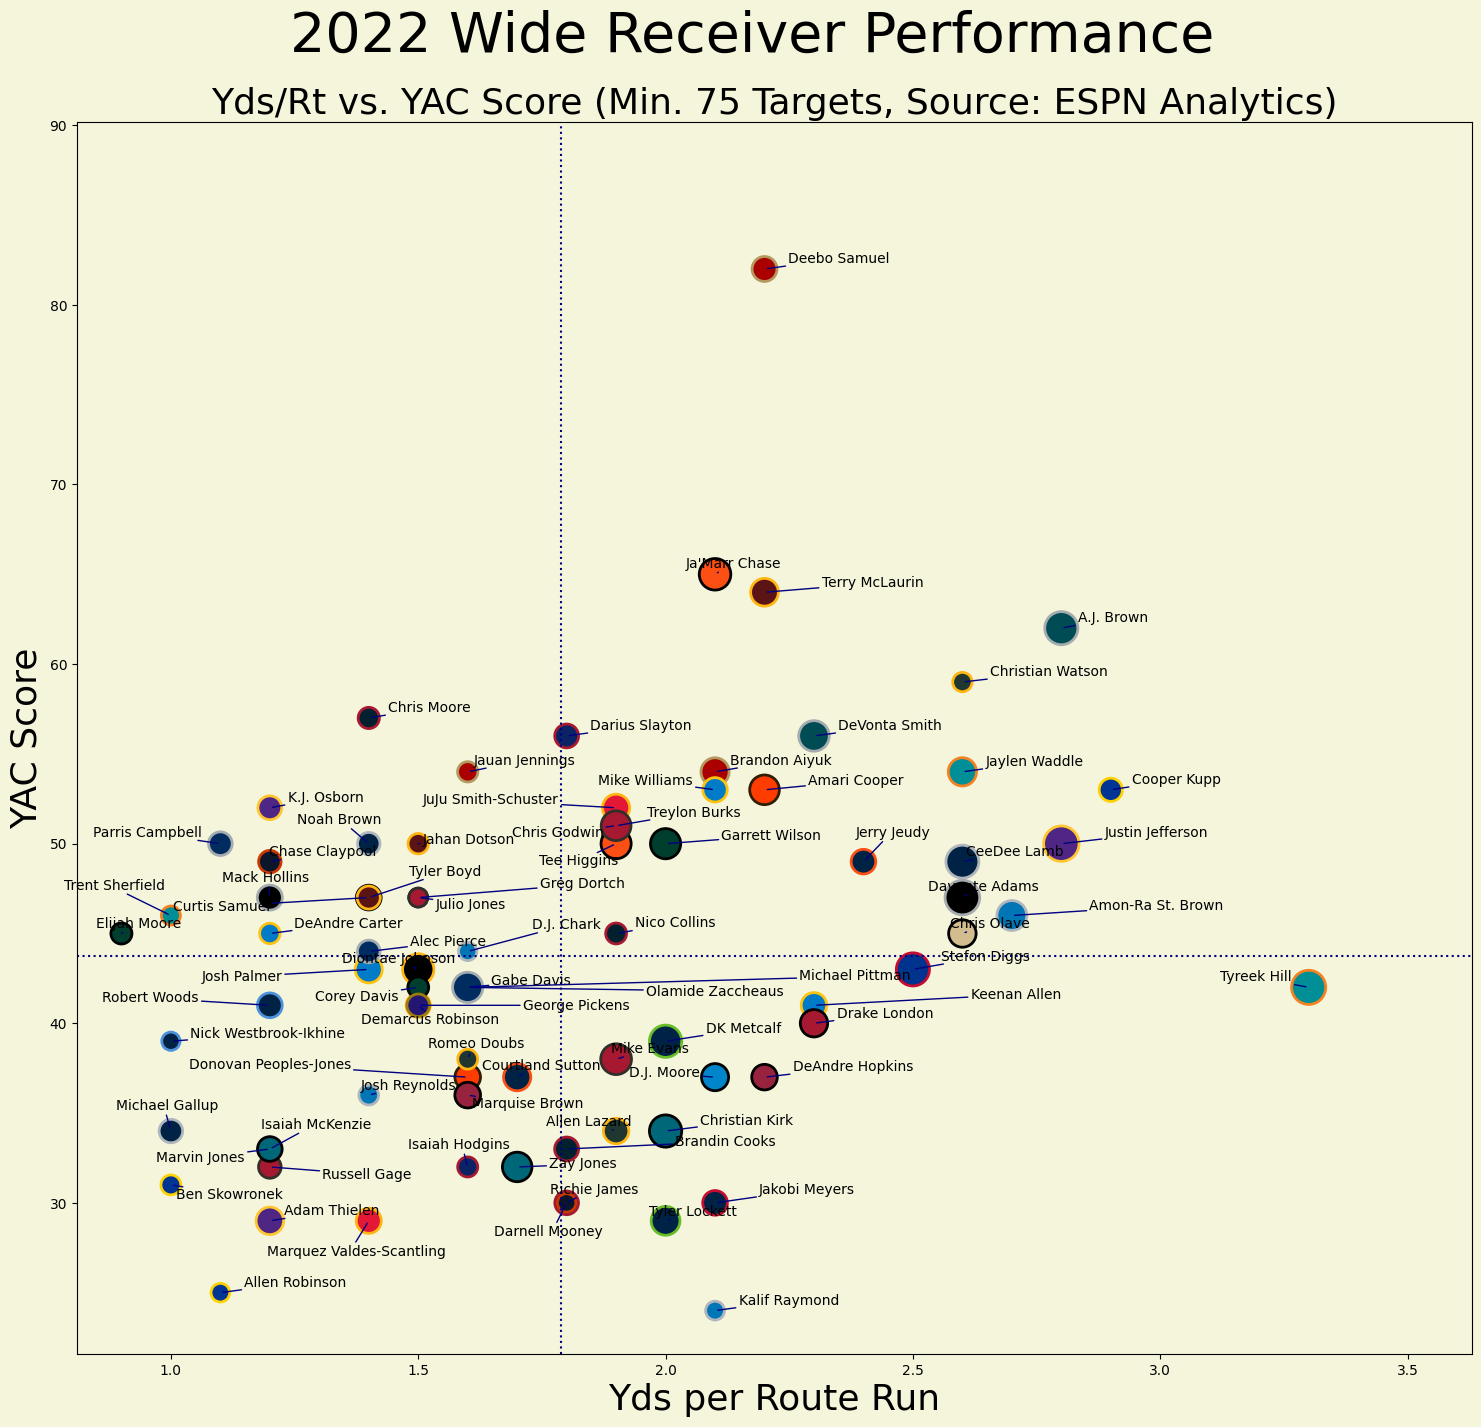

In [15]:
fig, ax = plt.subplots(figsize=(18, 16))

fig.patch.set_facecolor('beige')
ax.set_facecolor('beige')

# Use scatter points instead of logos
# adjust size of points relative to 'Att'
point_size = receivers['tgts'] / max(receivers['tgts']) * 650
scatter = ax.scatter(receivers['Yds/Rt'], receivers['YAC'], c=receivers['team_color'],
                     s=point_size, edgecolor=receivers['team_color2'], linewidth=2)

texts = []
for x0, y0, player in zip(receivers['Yds/Rt'], receivers['YAC'], receivers['Player']):
    texts.append(ax.text(x0, y0, player, fontsize=10))

# Adjust text labels
adjust_text_params = {
    'texts': texts,
    'expand_points': (1.5, 1.5),
    'expand_text': (1.5, 1.5),
    'arrowprops': {
        'arrowstyle': '-',
        'color': 'navy',
    },
}
adjust_text(**adjust_text_params)

plt.suptitle("2022 Wide Receiver Performance",
             fontsize=40, y=0.95, ha='center')
plt.title("Yds/Rt vs. YAC Score (Min. 75 Targets, Source: ESPN Analytics)",
          fontsize=26, y=1.0, ha='center')
plt.xlabel('Yds per Route Run', fontsize=26)
plt.ylabel('YAC Score', fontsize=26)

# make the axes limits +10% of the max value
x_max = receivers['Yds/Rt'].max()
y_max = receivers['YAC'].max()

# make the axes minimums -10% of the max value
x_min = receivers['Yds/Rt'].min()
y_min = receivers['YAC'].min()

# set the axes limits
plt.xlim(x_min * 0.9, x_max * 1.1)
plt.ylim(y_min * 0.9, y_max * 1.1)

# Draw horizontal and vertical lines at the mean of each axis
mean_y = receivers['YAC'].mean()
mean_x = receivers['Yds/Rt'].mean()

plt.axhline(mean_y, color='navy', linestyle='dotted')
plt.axvline(mean_x, color='navy', linestyle='dotted')

# Save the plot as a high-quality image
plt.savefig('../images/espn_wrs_yac.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [11]:

# Remove max column limit
pd.set_option('display.max_columns', None)

In [12]:
receivers[receivers['Player'] == 'Cooper Kupp']

,Player,Team,tgts,Yds/Rt,YAC,Open,Catch,Pos.,team_abbr,team_name,team_id,team_nick,team_conf,team_division,team_color,team_color2,team_color3,team_color4,team_logo_wikipedia,team_logo_espn,team_wordmark,team_conference_logo,team_league_logo,team_logo_squared
63,Cooper Kupp,Rams,79,2.9,53,55,63,WR,LA,Los Angeles Rams,2510,Rams,NFC,NFC West,#003594,#FFD100,#001532,#af925d,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/lar.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
